In [1]:
import torch
from torchvision.datasets import CIFAR10, CIFAR100, STL10, ImageFolder
from augmentations import SimCLRTransform, SimSiamTransform

from torch.utils.data import DataLoader


In [2]:
torch.cuda.is_available()

True

In [3]:
import os
import re

regex = re.compile('Validation accuracy ([0-9]*.[0-9]*)')
regex2 = re.compile('Epoch ([0-9]*)')

location = "/Users/Luctopikut/bep/BEP-DoGo/data/output/luc/"
# location = './data/output/luc'
file_name ='train_cifar10.log'

def get_loss(location, file_name):
    result = dict()
    counter =0
    regex = re.compile('Loss: ([0-9]*.[0-9]*)')
    regex2 = re.compile('Epoch ([0-9]*)')
    for filename in os.listdir(location):
        if filename == file_name:
            with open(os.path.join(location, file_name), "r") as file:
                
                for line in file:
                    if 'Epoch [' in line:
                        if 'Loss:' in line:
                            counter +=1
                            result[counter] = regex.findall(line)[0]
    return result

def get_acc(location, file_name):
    result = dict()
    counter =0
    regex = re.compile('Validation accuracy ([0-9]*.[0-9]*)')
    regex2 = re.compile('Epoch ([0-9]*)')
    for filename in os.listdir(location):
        if filename == file_name:
            with open(os.path.join(location, file_name), "r") as file:
                
                for line in file:
                    if 'Epoch [' in line:
                        if 'Validation accuracy ' in line:
                            result[counter] = regex.findall(line)[0]
                            counter +=1
    return result

results = get_acc(location, file_name)

In [4]:
results

{0: '0.5917467948717948',
 1: '0.5985576923076923',
 2: '0.6035657051282052',
 3: '0.60546875',
 4: '0.6105769230769231',
 5: '0.6098758012820513',
 6: '0.612479967948718',
 7: '0.612479967948718',
 8: '0.61328125',
 9: '0.6141826923076923',
 10: '0.616386217948718',
 11: '0.6171875',
 12: '0.6160857371794872',
 13: '0.6180889423076923',
 14: '0.6147836538461539',
 15: '0.6166866987179487',
 16: '0.6188902243589743',
 17: '0.6147836538461539',
 18: '0.6189903846153846',
 19: '0.6200921474358975',
 20: '0.6180889423076923',
 21: '0.616386217948718',
 22: '0.6199919871794872',
 23: '0.6200921474358975',
 24: '0.6215945512820513',
 25: '0.6198918269230769',
 26: '0.621895032051282',
 27: '0.621895032051282',
 28: '0.6201923076923077',
 29: '0.6203926282051282',
 30: '0.6214943910256411',
 31: '0.6214943910256411',
 32: '0.6239983974358975',
 33: '0.6224959935897436',
 34: '0.6235977564102564',
 35: '0.6238982371794872',
 36: '0.6244991987179487',
 37: '0.6240985576923077',
 38: '0.6246995

In [5]:
results_no_focal = get_loss(location, file_name)

In [6]:
location = "/Users/Luctopikut/bep/data/output/cifar_10_focal"
# location = './data/output/luc'
file_name ='train.log'

results = get_loss(location, file_name)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



def prep_for_plot(results):
    df = pd.DataFrame(results.items())
    df.rename(columns={0:'x', 1:'y'}, inplace=True)
    df['y'] = pd.to_numeric(df['y'])
    return df

df_no_focal = prep_for_plot(results_no_focal)
df2 = prep_for_plot(results)
df2['y_no_focal'] = df_no_focal['y']

fig = px.line(df2, x="x", y="y", title='Loss per Epoch')
fig.add_scatter(x=df2['x'], y=df2['y_no_focal'], mode='lines', hovertext=df2['y_no_focal'], hoverinfo="text",name = 'no_focal')
fig.show()



In [36]:
location = "/Users/Luctopikut/bep/BEP-DoGo/data/output/luc/"
# location = './data/output/luc'
file_name ='train_cifar10.log'

acc_no_focal = get_acc(location, file_name)

location = "/Users/Luctopikut/bep/data/output/cifar_10_focal"
# location = './data/output/luc'
file_name ='train.log'

acc = get_acc(location, file_name)

def prep_for_plot(results):
    df = pd.DataFrame(results.items())
    df.rename(columns={0:'x', 1:'y'}, inplace=True)
    df['y'] = pd.to_numeric(df['y'])
    return df
df_no_focal = prep_for_plot(acc_no_focal)
df2 = prep_for_plot(acc)
df2['y_no_focal'] = df_no_focal['y']

fig = px.line(df2, x="x", y="y", title='Acc per Epoch')
fig.add_scatter(x=df2['x'], y=df2['y_no_focal'], mode='lines', hovertext=df2['y_no_focal'], hoverinfo="text",name= 'base')
fig.update_layout(showlegend=False)  # Hide the legend

fig.show()

In [37]:
location = "/Users/Luctopikut/bep/data/output/cifar_unbalanced_curr"

acc_no_focal = get_acc(location, file_name)


location = "/Users/Luctopikut/bep/data/output/cifar_unbalanced"

acc = get_acc(location, file_name)

df_no_focal = prep_for_plot(acc_no_focal)
df2 = prep_for_plot(acc)
df2['y_no_focal'] = df_no_focal['y']

fig = px.line(df2, x="x", y="y", title='Acc per Epoch')
fig.add_scatter(x=df2['x'], y=df2['y_no_focal'], mode='lines', hovertext=df2['y_no_focal'], hoverinfo="text",name= 'DoGo(Curriculum)')
fig.update_layout(showlegend=False)  # Hide the legend

fig.show()

In [40]:
location = "/Users/Luctopikut/bep/data/output/cifiar10_curr_balanced"

acc_no_focal = get_acc(location, file_name)


location = "/Users/Luctopikut/bep/data/output/cifar_10_focal"

acc = get_acc(location, file_name)

df_no_focal = prep_for_plot(acc_no_focal)
df2 = prep_for_plot(acc)
df2['y_no_focal'] = df_no_focal['y']

fig = px.line(df2[0:30], x="x", y="y", title='Acc per Epoch')
fig.add_scatter(x=df2['x'][0:30], y=df2['y_no_focal'], mode='lines', hovertext=df2['y_no_focal'], hoverinfo="text",name= 'base')
fig.update_layout(showlegend=False)  # Hide the legend

fig.show()

In [11]:
label_to_word = {
    0: "Airplane",
    1: "Autombile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}


<Axes: title={'center': 'Accuracy per Class'}, xlabel='Epoch', ylabel='Accuracy'>

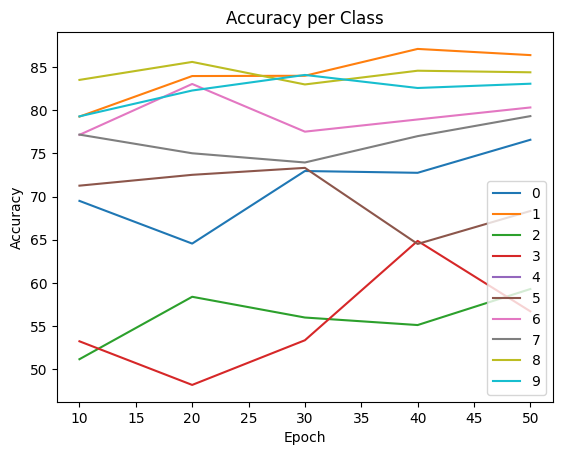

In [12]:
import json
location = "/Users/Luctopikut/bep/BEP-DoGo/"
# C:\Users\Luctopikut\bep\BEP-DoGo\convert_cifar10.txt
file_name = 'convert_safe.txt'
result = dict()
counter =0
# regex = re.compile('Validation accuracy ([0-9]*.[0-9]*)')
# regex2 = re.compile('Epoch ([0-9]*)')
data = dict()
for filename in os.listdir(location):
    if filename == file_name:
        with open(os.path.join(location, file_name), "r") as file:
            dictionary = json.load(file)
for i in range(10, 51, 10):
    # print(i)
    data[i] = dictionary[f'{i}'][0]

df = pd.DataFrame.from_dict(data, orient='index')
df.plot(xlabel='Epoch', ylabel='Accuracy', title= 'Accuracy per Class')\
# df

In [13]:
for epoch in range(1,2):
    print(epoch)

1


In [14]:
transform = SimCLRTransform(32)

train_dataset_no_transform = CIFAR10('/data/input/datasets/CIFAR-10', train=True, download=True)#, transform=transform)
train_dataset = CIFAR10('/data/input/datasets/CIFAR-10', train=True, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [15]:
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=False, drop_last=True, num_workers= 4)


In [16]:
from PIL import Image

train_dataset_no_transform

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /data/input/datasets/CIFAR-10
    Split: Train

In [17]:
# import numpy as np
# for i, ((x1, y1), targets) in enumerate(train_loader):
#     # print(targets)
#     # print(x1[0:10].shape)#, y1)
#     # print(targets[0:10].shape)  
#     # print(y1[0:10].shape)
#     images = x1[0:15]
#     labels = targets[0:15]
#     fig, axs = plt.subplots(1, 1)
#     for i, ax in enumerate(np.reshape(axs, [-1])):

#         ax.imshow(images[0].permute(1, 2, 0))
#     # print(images[0].shape)
#     # plot_15_img(label_to_word, images, labels)
#     break

In [18]:
def multi_acc(pred, label):
  accs_per_label_pct = []
  tags = torch.argmax(pred, dim=1)
  for c in range(3):  # the three classes
    of_c = label == c
    num_total_per_label = of_c.sum()
    of_c &= tags == label
    num_corrects_per_label = of_c.sum()
    accs_per_label_pct.append(num_corrects_per_label / num_total_per_label * 100)
  return accs_per_label_pct

In [19]:
from util.utils import save_checkpoint, log

from datetime import datetime

def train_one_epoch(train_loader, model, criteria, optimizer, scheduler):
    """
    Train one epoch of SSL model
    """
    loss_per_criterion = {}
    total_loss = 0
    for i, ((x1, y1), targets) in enumerate(train_loader):
        x1 = x1.cuda(device=torch.device("cuda"))
        y1 = y1.cuda(device=torch.device("cuda"))
        optimizer.zero_grad()
        print(targets)
        break

        _, _, zx, zy = model(x1, y1)


        # nb_classes = 9

        # confusion_matrix = torch.zeros(nb_classes, nb_classes)
        # with torch.no_grad():
        #     for i, (inputs, classes) in enumerate(dataloaders['val']):
        #         inputs = inputs.to(args.device)
        #         classes = classes.to(args.device)
        #         outputs = model(inputs)
        #         _, preds = torch.max(outputs, 1)
        #         for t, p in zip(classes.view(-1), preds.view(-1)):
        #                 confusion_matrix[t.long(), p.long()] += 1

        # Multiple loss aggregation
    
        loss = torch.tensor(0).to(torch.device("cuda"))
        for k in criteria:
            if k == 'ntxent':
                criterion_loss = criteria[k][0](zx, zy)
            elif k == 'simsiam':
                criterion_loss = criteria[k][0](zx, zy, px, py)
            if k not in loss_per_criterion:
                loss_per_criterion[k] = criterion_loss
            else:
                loss_per_criterion[k] += criterion_loss
            loss = torch.add(loss, torch.mul(criterion_loss, criteria[k][1]))
        print(loss)
        loss.backward()
        # print(loss)
        # print(targets)
        optimizer.step()
        if scheduler is not None:
            scheduler.step()
        if i % 50 == 0:
            log("Batch {}/{}. Loss: {}.  Time elapsed: {} ".format(i, len(train_loader), loss.item(),
                                                                   datetime.now() - datetime.now()))
        total_loss += loss.item()
    return total_loss, loss_per_criterion

In [20]:
import torch.nn as nn
import torchvision
import torch
import torch.nn.functional as F
from models.helper import get_encoder


class SimCLR(nn.Module):
    def __init__(self, img_size, backbone='resnet50'):
        super(SimCLR, self).__init__()
        self.f, projection_size = get_encoder(backbone, img_size)
        if img_size >= 100:
            projection_size = self.f.fc.out_features

        # projection head
        self.g = nn.Sequential(
                                nn.Linear(projection_size, 512, bias=False),
                                nn.BatchNorm1d(512),
                                nn.ReLU(inplace=True),
                                nn.Linear(512, 128, bias=True)
                               )

    def forward(self, x, y=None):
        x = self.f(x)
        feat_x = torch.flatten(x, start_dim=1)
        out_x = self.g(feat_x)

        if y is not None:
            y = self.f(y)
            feat_y = torch.flatten(y, start_dim=1)
            out_y = self.g(feat_y)
            return F.normalize(feat_x, dim=-1), F.normalize(feat_y, dim=-1), F.normalize(out_x, dim=-1),  F.normalize(out_y, dim=-1)
        else:
            return F.normalize(feat_x, dim=-1), F.normalize(out_x, dim=-1)




In [21]:
import torch
import torch.nn as nn
from util.utils import positive_mask
from torch.optim import Adam, SGD


class NTXent(nn.Module):
    """
    The Normalized Temperature-scaled Cross Entropy Loss
    Source: https://github.com/Spijkervet/SimCLR
    """

    def __init__(self):
        super(NTXent, self).__init__()
        self.batch_size = 256
        self.temperature = 0.5
        self.device = torch.device('cuda')
        self.mask = positive_mask(256)
        self.criterion = nn.CrossEntropyLoss(reduction="sum")
        self.similarity_f = nn.CosineSimilarity(dim=2)
        self.N = 2 * self.batch_size

    def forward(self, zx, zy):
        """
        zx: projection output of batch zx
        zy: projection output of batch zy
        :return: normalized loss
        """
        positive_samples, negative_samples = self.sample_no_dict(zx, zy)
        labels = torch.zeros(self.N).to(positive_samples.device).long()
        logits = torch.cat((positive_samples, negative_samples), dim=1)
        loss = self.criterion(logits, labels)
        loss /= self.N
        return loss

    def sample_no_dict(self, zx, zy):
        """
        Positive and Negative sampling without dictionary
        """
        z = torch.cat((zx, zy), dim=0)
        sim = self.similarity_f(z.unsqueeze(1), z.unsqueeze(0)) / self.temperature
        # Since projections are already normalized using F.normalize,
        # below function can be used instead of CosineSimilarity
        # sim = torch.div(torch.matmul(z, z.T), self.temperature)

        # Extract positive samples
        sim_xy = torch.diag(sim, self.batch_size)
        sim_yx = torch.diag(sim, -self.batch_size)
        positive_samples = torch.cat((sim_xy, sim_yx), dim=0).reshape(self.N, 1)

        # Extract negative samples
        negative_samples = sim[self.mask].reshape(self.N, -1)
        return positive_samples, negative_samples



In [22]:
def get_criteria():
    """
    Loss criterion / criteria selection for training
    """
    criteria = {
        'ntxent': [NTXent(), [1, 0][0]]
    }

    return criteria

In [23]:
from torch.optim.lr_scheduler import CosineAnnealingLR

criterion = get_criteria()

model = SimCLR(32, backbone='resnet18')

optimizer = Adam(model.parameters(), lr=0.0003, weight_decay=1.e-6)
scheduler = CosineAnnealingLR(optimizer, T_max=200, eta_min=3e-4)




model = model.to(torch.device("cuda"))
train_one_epoch(train_loader, model, criterion, optimizer, scheduler)

c:\Users\Luctopikut\bep\BEP-DoGo\util\utils.py:36: UserWarning:

masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorAdvancedIndexing.cpp:1773.)

c:\Users\Luctopikut\anaconda3\envs\main\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

c:\Users\Luctopikut\anaconda3\envs\main\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.



tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6,
        2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2,
        2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9,
        6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6,
        1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1,
        2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6,
        2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5,
        1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7,
        8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5,
        8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5,
        8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1])


(0, {})

In [24]:
tenso_list = [torch.randn(3,4), torch.randn(2,5), torch.randn(6,8)]
comb_length =0
for tensor in tenso_list:
    comb_length += tensor.numel()

print(comb_length)

70


In [25]:
tenso_list

[tensor([[-0.0793,  0.6057, -0.7102, -0.5879],
         [ 1.2825,  0.9370, -1.0259, -0.0078],
         [-0.2249,  0.1854,  0.6045, -0.7983]]),
 tensor([[-0.6421, -2.8021, -1.1260,  0.5001,  0.5883],
         [-0.9787, -1.7650,  0.0515,  0.1622,  0.9470]]),
 tensor([[-0.9868,  0.2907, -0.5518, -1.4196, -0.6239,  0.7363, -0.3350,  1.0095],
         [ 0.0687,  0.9866,  1.0178,  0.9231, -1.3906,  0.4376, -0.2977,  0.6695],
         [-0.5889, -0.0910, -0.5623,  0.7799, -0.1795, -0.6697,  0.0113, -0.1753],
         [-0.1019,  0.1506,  0.0394, -1.1448,  0.8311,  1.5280, -1.4453, -0.6978],
         [ 0.2126,  0.8595,  1.5516,  0.5595, -0.0339,  2.3647, -1.2178, -1.8845],
         [ 1.3480,  1.5241,  1.5097,  0.6468, -0.0273,  0.9336, -1.1514, -3.1741]])]

In [26]:
import torch._tensor as tensor
torch_list = [torch.tensor(50., device='cuda:0'), torch.tensor(33.3333, device='cuda:0'), torch.tensor(50., device='cpu')]
torch_list2 = [torch.tensor(52., device='cuda:0'), torch.tensor(63.3333, device='cpu'), torch.tensor(80., device='cuda:0')]
n = len(torch_list)
new_list =[torch.empty(()) for _ in range(n)]
for i in range(len(torch_list)):
    # print(new_list[i])
    new_list[i] = torch_list[i].item()
    new_list[i] += torch_list2[i].item()
print(new_list)

[102.0, 96.6666030883789, 130.0]


In [27]:
torch.tensor(50., device='cuda:0')

tensor(50., device='cuda:0')

In [28]:
print(len(torch_list))

3


In [29]:
torch_list[0].item()

50.0

In [30]:
import torch
import torch.utils.data as data

class ClassProbabilitySampler(data.Sampler):
    def __init__(self, dataset, class_probabilities):
        self.dataset = dataset
        self.class_probabilities = class_probabilities

    def __iter__(self):
        indices = []
        num_samples = len(self.dataset)

        # Generate indices based on class probabilities
        for class_idx, class_prob in enumerate(self.class_probabilities):
            class_indices = [idx for idx in range(num_samples) if self.dataset[idx][1] == class_idx]
            num_class_samples = int(class_prob * num_samples)
            sampled_indices = torch.randperm(len(class_indices))[:num_class_samples]
            indices.extend([class_indices[idx] for idx in sampled_indices])

        return iter(indices)

    def __len__(self):
        return len(self.dataset)
    

In [31]:
x1

NameError: name 'x1' is not defined

In [ ]:
import json

# Open the text file in read mode
with open('convert.txt', 'r') as file:
    # Read the contents of the file
    content = file.read()

    # Parse the content as a dictionary
    dictionary = json.loads(content)

# Print the dictionary
print(dictionary)

In [ ]:
dictionary['1'][0][4] = 0

In [ ]:
dictionary['1'][0]

In [ ]:
[23.51325700293839, nan, 3.5020770213902446, nan, 0.2, nan, 15.253893070451095, nan, nan, 19.204045858138645]

NameError: name 'nan' is not defined

In [ ]:
import math
math.nan


nan

In [ ]:
epoch = 